## Part 1 - Data Cleaning
### Step 1: Check Dataset Structure

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\20111\Downloads\bi.xlsx")

print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (77, 11)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None

First 5 rows:
       fNAME      lNAME  Age  gender       country  residence  entryEXAM  \
0  Christina     Binger   44  Female        Norway    Private         72   
1       Alex   Walekhwa   60       M         Kenya  

## Step 2: Detect and Fix Inconsistent Categories

### Gender inconsistencies

In [5]:
print("Gender unique values:", df['gender'].unique())


Gender unique values: ['Female' 'M' 'Male' 'F' 'female' 'male']


### Country inconsistencies



In [7]:
print("Country unique values:", df['country'].unique())


Country unique values: ['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']


### Education inconsistencies



In [9]:
print("Education unique values:", df['prevEducation'].unique())


Education unique values: ['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


### residence inconsistencies

In [11]:
print("residence unique values:", df['residence'].unique())

residence unique values: ['Private' 'Sognsvann' 'BI Residence' 'BI-Residence' 'BIResidence'
 'BI_Residence']


### Fixing the inconsistencies



#### Fix gender


In [13]:
df['gender'] = df['gender'].str.strip().str.lower()
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})

#### Fix country


In [53]:

df['country'] = df['country'].str.strip().str.title()
df['country'] = df['country'].replace({
    'Rsa': 'Rusia',
    'Norge': 'Norway',
    'Uk':'United kingdom'
})


#### Fix education

In [19]:
df['prevEducation'] = df['prevEducation'].str.strip().str.title()
df['prevEducation'] = df['prevEducation'].replace({
    'Highschool': 'High School',
    'Barrrchelors': 'Bachelors',
    'Diplomaaa': 'Diploma',
    'Dipoma': 'Diploma',
    'DIPLOMA': 'Diploma'
})

In [71]:
print("Education unique values:", df['prevEducation'].unique())


Education unique values: ['Masters' 'Diploma' 'High School' 'Bachelors' 'Doctorate']


#### Fix residence

In [89]:
df['residence'] = df['residence'].str.strip().str.title()
df['residence'] = df['residence'].replace({
    'Bi-Residence': 'Bi Residence',
    'Biresidence': 'Bi Residence',
    'Bi_Residence': 'Bi Residence'
})

In [91]:
print("residence unique values:", df['residence'].unique())

residence unique values: ['Private' 'Sognsvann' 'Bi Residence']


In [23]:
print(df.head())

       fNAME      lNAME  Age  gender       country  residence  entryEXAM  \
0  Christina     Binger   44  female        Norway    Private         72   
1       Alex   Walekhwa   60    male         Kenya    Private         79   
2     Philip        Leo   25    male        Uganda  Sognsvann         55   
3      Shoni  Hlongwane   22  female         Rusia  Sognsvann         40   
4      Maria   Kedibone   23  female  South Africa  Sognsvann         65   

  prevEducation  studyHOURS  Python  DB  
0       Masters         158    59.0  55  
1       Diploma         150    60.0  75  
2   High School         130    74.0  50  
3   High School         120     NaN  44  
4   High School         122    91.0  80  


## Step 3: Handle Duplicates


In [25]:
print("Number of duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicates: 0


## Part 2 - Missing Data
### Step 4: Identify Missing Values

In [27]:
print("Missing values:")
print(df.isnull().sum())


Missing values:
fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64


### Step 5: Impute Missing Values


#### Fill missing Python scores with median (less sensitive to outliers)


In [29]:
python_median = df['Python'].median()
df['Python'] = df['Python'].fillna(python_median)

#### Verify no more missing values


In [31]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64


## Part 3 - Outliers
### Step 6: Detect Outliers

#### Summary statistics


In [33]:
print("Python stats:")
print(df['Python'].describe())
print("\nDB stats:")
print(df['DB'].describe())
print("\nStudy hours stats:")
print(df['studyHOURS'].describe())



Python stats:
count    77.000000
mean     75.987013
std      15.228517
min      15.000000
25%      72.000000
50%      81.000000
75%      85.000000
max      91.000000
Name: Python, dtype: float64

DB stats:
count     77.000000
mean      69.467532
std       17.033701
min       30.000000
25%       56.000000
50%       71.000000
75%       83.000000
max      100.000000
Name: DB, dtype: float64

Study hours stats:
count     77.000000
mean     149.714286
std       12.743272
min      114.000000
25%      144.000000
50%      156.000000
75%      158.000000
max      160.000000
Name: studyHOURS, dtype: float64


#### Boxplots

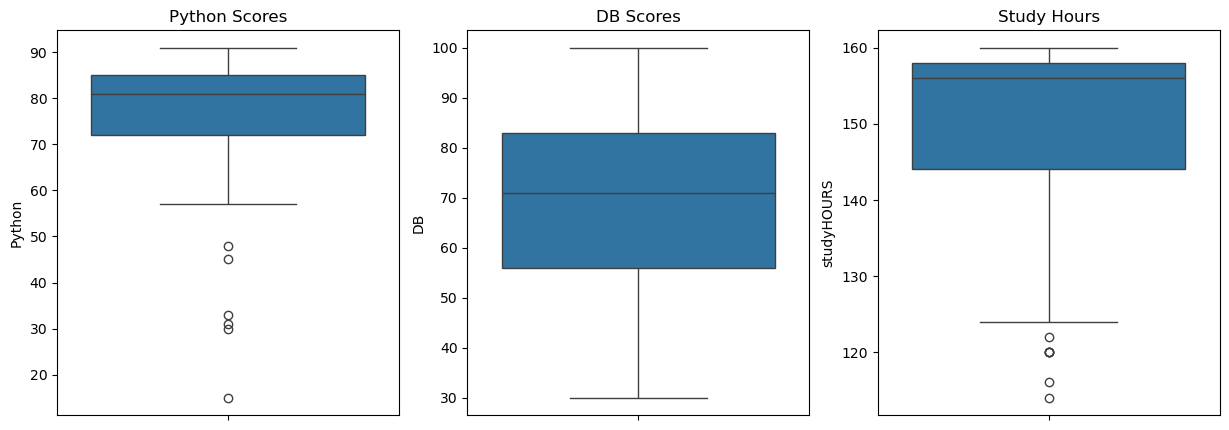

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Python'])
plt.title('Python Scores')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['DB'])
plt.title('DB Scores')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['studyHOURS'])
plt.title('Study Hours')
plt.show()

## Step 7: Handle Outliers
### Remove unrealistic scores (<0 or >100)


In [37]:
df = df[(df['Python'] >= 0) & (df['Python'] <= 100)]
df = df[(df['DB'] >= 0) & (df['DB'] <= 100)]

### For study hours, use IQR method

In [39]:
Q1 = df['studyHOURS'].quantile(0.25)
Q3 = df['studyHOURS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['studyHOURS'] >= lower_bound) & (df['studyHOURS'] <= upper_bound)]

## Final Cleaning and Export


### Reset index and Save cleaned dataset

In [97]:
df = df.reset_index(drop=True)

df.to_csv('C:\Users\20111\Downloadscleaned_students.csv', index=False)

print("Final dataset shape:", df.shape)
print("\nCleaning completed successfully!")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1886661715.py, line 3)